<a href="https://colab.research.google.com/github/soodeh-nilforoushan/Retail-Analysis-with-Walmart-Data/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization
import seaborn as sns  # visualization

In [ ]:
data= pd.read_csv("Walmart.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


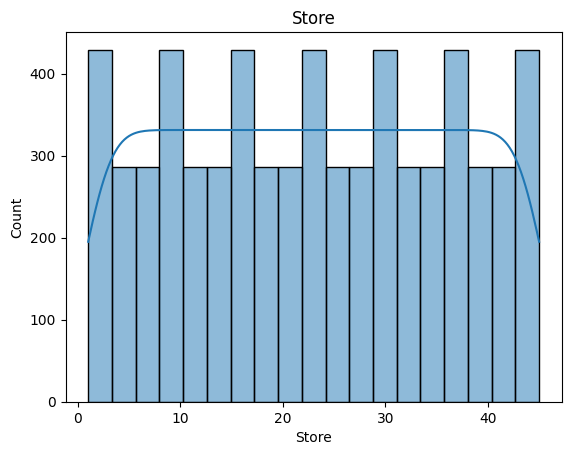

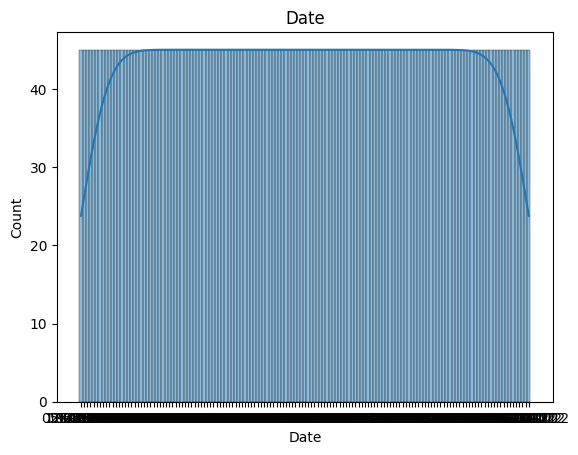

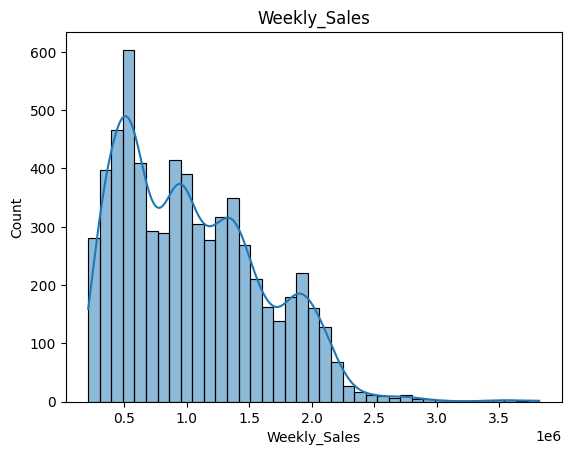

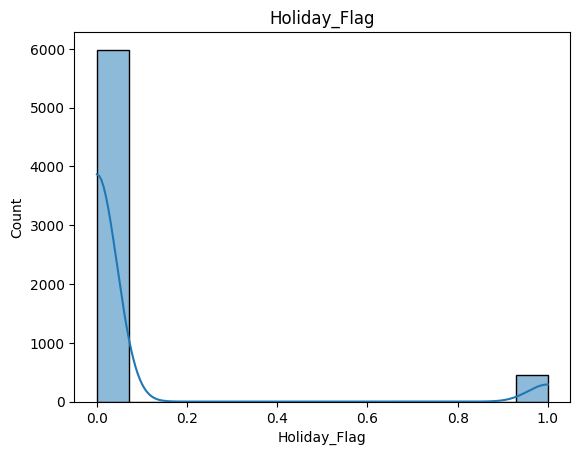

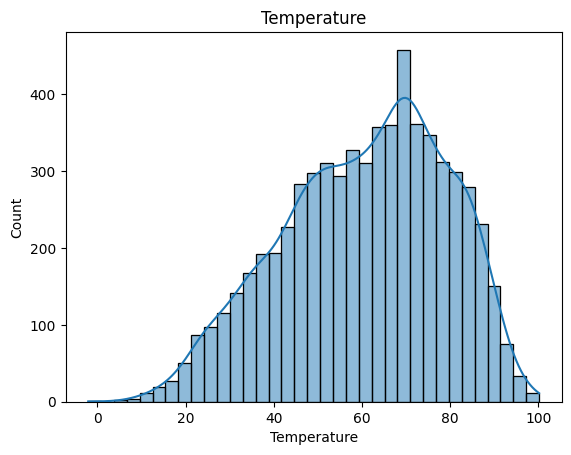

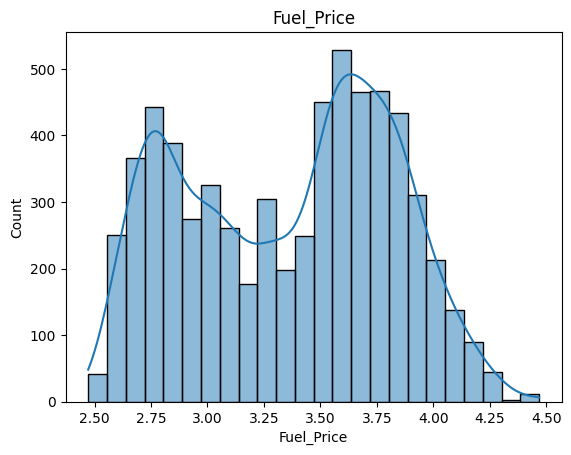

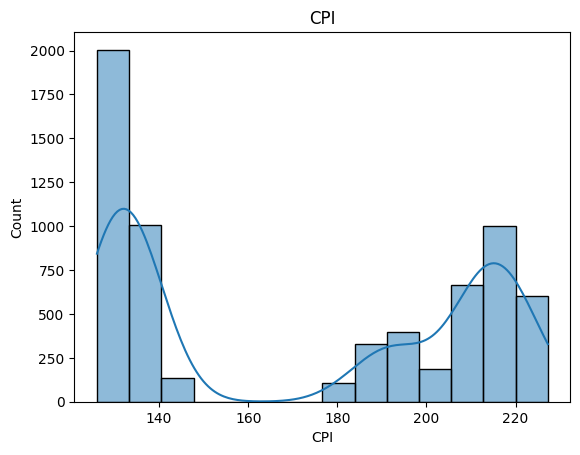

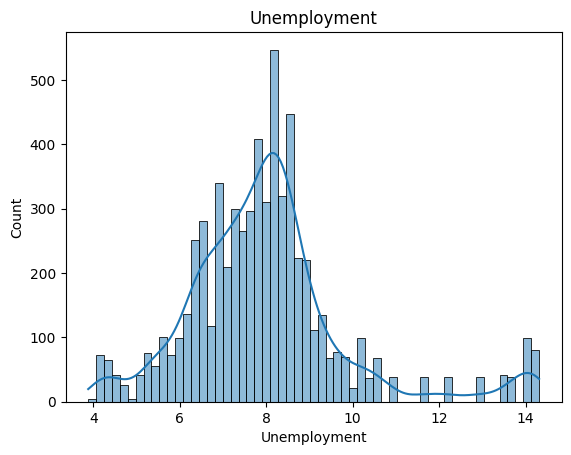

In [ ]:
for col_name in data.columns:
    sns.histplot(x =col_name, data = data, kde = True)
    plt.title(col_name)
    plt.show()

1-Which store has maximum sales?


In [ ]:
mean_income=data.groupby("Store")["Weekly_Sales"].mean()

In [ ]:
print(mean_income)

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64


In [ ]:
type(mean_income)

pandas.core.series.Series

In [ ]:
print(mean_income.max())

2107676.8703496503


max weekly sales was for store 20th.

In [ ]:
#find the store id with max income
max_mean_store_id = mean_income.idxmax()

#find the value
max_mean_value=mean_income[max_mean_store_id]
print("store:",  max_mean_store_id , ", max sales:", max_mean_value)

store: 20 , max sales: 2107676.8703496503


**Store number 20 has max sales**

2- Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [ ]:
std_income=data.groupby("Store")["Weekly_Sales"].std()

In [ ]:
std_income

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64

In [ ]:
print(std_income.max())

317569.9494755081


max standard deviation is for store 14th

In [ ]:
coef=[m/s for m,s in zip(mean_income,std_income)]
# print(coef)
print(pd.DataFrame(coef))

            0
0    9.970873
1    8.102160
2    8.694034
3    7.868902
4    8.426840
5    7.362531
6    5.068303
7    8.550456
8    7.880502
9    6.284032
10   8.179167
11   7.250300
12   7.546394
13   6.363884
14   5.171059
15   6.053978
16   7.966815
17   6.140790
18   7.536924
19   7.639263
20   5.872253
21   6.378248
22   5.564175
23   8.088169
24   6.255458
25   9.081773
26   7.398888
27   7.281744
28   5.442400
29  19.227797
30  11.091264
31   8.452336
32  10.767931
33   9.239989
34   4.353863
35   6.150859
36  23.761933
37   9.019129
38   6.670767
39   8.101772
40   6.748681
41  11.069866
42  15.599741
43  12.225939
44   6.038183


3-**Which store/s has good quarterly growth rate in Q3’2012**



In [ ]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
type(data["Date"])

pandas.core.series.Series

In [ ]:
# Convert the 'Date' column to a datetime type
data["Date"]=pd.to_datetime(data["Date"])

<ipython-input-17-08290fc341d3>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"]=pd.to_datetime(data["Date"])


In [ ]:
# Convert the 'date' column to a datetime type
data["Date"]

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
data["year"]=data["Date"].dt.year
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.year

In [ ]:
# "Q3'2012" specifies the time period from the beginning of the third quarter (July 1st) to the end of the third quarter (September 30th) in the year 2012.

filterd_data=data[(data["year"]==2012) & (data["month"]>=7) & (data["month"]<=9) ]

In [ ]:
filterd_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348,2012,9,2012
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143,2012,8,2012
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,7,2012
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7,2012
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7,2012
...,...,...,...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,2012,8,2012
6427,45,2012-07-09,766512.66,1,75.70,3.911,191.577676,8.684,2012,7,2012
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,2012,9,2012
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684,2012,9,2012


In [ ]:
grouped_store_year2012=data.groupby("Store")["Weekly_Sales"].mean()

In [ ]:
grouped_store_year2012

Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64

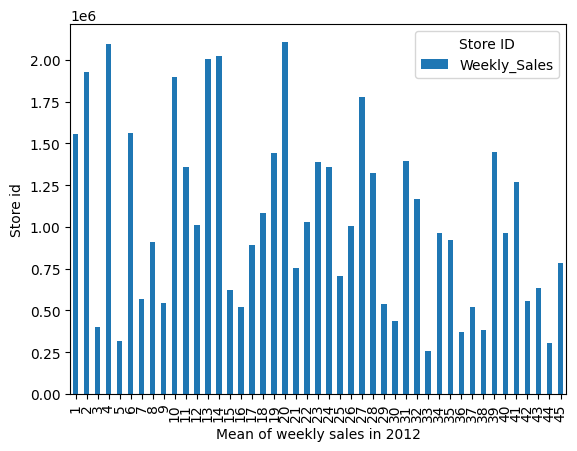

In [ ]:
grouped_store_year2012.plot(kind='bar')
plt.xlabel('Mean of weekly sales in 2012')
plt.ylabel('Store id')
plt.legend(title='Store ID', loc='upper right')
plt.show()


we can see store 4 and 20 had better sale in Q3'2012 compare to other stores.

# 4- Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [ ]:
grouped=data.groupby("Holiday_Flag")["Weekly_Sales"].mean()

In [ ]:
grouped

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
holiday_day=data[data["Holiday_Flag"]==0]
non_holdiday_day=data[data["Holiday_Flag"]==1]

In [ ]:
mean_non_holiday=grouped[1]
#it shows mean of non holidat sales in all store together

In [ ]:
holiday_day

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,2010
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,2012


In [ ]:
print(len(holiday_day))

5985


In [ ]:
print("These values shows the holidays sales which has larger value than mean of non holiday")
for i in holiday_day["Weekly_Sales"]:
  if (i> mean_non_holiday):
    print(i)

These values shows the holidays sales which has larger value than mean of non holiday
1643690.9
1611968.17
1409727.59
1554806.68
1439541.59
1472515.79
1404429.92
1594968.28
1545418.53
1466058.28
1391256.12
1425100.71
1603955.12
1494251.5
1399662.07
1432069.95
1615524.71
1542561.09
1503284.06
1422711.6
1492418.14
1546074.18
1448938.92
1385065.2
1371986.6
1605491.78
1508237.76
1513080.49
1449142.92
1540163.53
1430378.67
1351791.03
1453329.5
1508239.93
1459409.1
1345454.0
1384209.22
1551659.28
1494479.49
1483784.18
1548033.78
1682614.26
1891034.93
2387950.2
1444732.28
1391013.96
1327405.42
1316899.31
1606629.58
1686842.78
1456800.28
1636263.41
1553191.63
1576818.06
1541102.38
1495064.75
1614259.35
1559889.0
1564819.81
1455090.69
1629391.28
1604775.58
1428218.27
1466046.67
1635078.41
1588948.32
1532114.86
1438830.15
1488538.09
1534849.64
1455119.97
1396926.82
1352219.79
1624383.75
1525147.09
1530761.43
1464693.46
1550229.22
1514259.78
1380020.27
1394561.83
1630989.95
1493525.93
1502562.78


# Provide a monthly and semester view of sales in units and give insights

In [ ]:
type("year")

str

In [ ]:
# data["day"]=data["Date"].dt.year
data["year_month"]=data["year"].astype(str)+"-"+data["month"].astype(str)
group1=data.groupby("year_month")["Weekly_Sales"].sum()

print(group1)

year_month
2010-1     4.223988e+07
2010-10    2.311201e+08
2010-11    1.587731e+08
2010-12    3.235716e+08
2010-2     1.915869e+08
2010-3     1.862262e+08
2010-4     1.838118e+08
2010-5     2.806119e+08
2010-6     1.424361e+08
2010-7     1.842664e+08
2010-8     1.845381e+08
2010-9     1.797041e+08
2011-1     2.119657e+08
2011-10    1.837193e+08
2011-11    2.534703e+08
2011-12    2.293760e+08
2011-2     1.876092e+08
2011-3     1.365205e+08
2011-4     2.789693e+08
2011-5     1.828017e+08
2011-6     1.401936e+08
2011-7     2.244611e+08
2011-8     1.880810e+08
2011-9     2.310323e+08
2012-1     1.722207e+08
2012-10    1.880794e+08
2012-11    4.692588e+07
2012-12    4.612851e+07
2012-2     1.428296e+08
2012-3     2.307397e+08
2012-4     1.825428e+08
2012-5     1.422830e+08
2012-6     2.923883e+08
2012-7     1.845865e+08
2012-8     1.916126e+08
2012-9     1.797959e+08
Name: Weekly_Sales, dtype: float64


In [ ]:
func=lambda row: (f"{row['year']}-1st") if row["month"]<=6 else (f"{row['year']}-2nd")
data["year_semester"]=data.apply(func, axis=1)
# print(data)
group2=data.groupby("year_semester")["Weekly_Sales"].sum()

print(group2)

year_semester
2010-1st    1.026913e+09
2010-2nd    1.261973e+09
2011-1st    1.138060e+09
2011-2nd    1.310140e+09
2012-1st    1.163004e+09
2012-2nd    8.371288e+08
Name: Weekly_Sales, dtype: float64


**Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a new variable 'days_since_5Feb2010'
# for store 1-Select the model which gives best accuracy.

earliest_date = min(data['Date'])
data['days_since_5Feb2010'] = (data['Date'] - earliest_date).dt.days

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,year_month,year_semester,days_since_5Feb2010
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2010,2010-5,2010-1st,112
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2010,2010-12,2010-2nd,326
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,2010,2010-2,2010-1st,40
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,2010,2010-2,2010-1st,47
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,2010,2010-5,2010-1st,113


In [ ]:
X=data.loc[data["Store"] == 1,["CPI", "Unemployment","Fuel_Price","days_since_5Feb2010"] ] #independat variables

y= data.loc[data["Store"]==1, ["Weekly_Sales"]] #dependant variables

In [ ]:
from sklearn import linear_model

regr=linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [ ]:
y_pred = regr.predict(X)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)


In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error: 22029598578.43
Mean Absolute Error: 102354.24
R-squared (R²): 0.09


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error: 34693719817.79
R-squared (R²): -0.43


In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error: 20122619295.72
R-squared (R²): 0.17


<ipython-input-65-362174ee2159>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors Regressor with k=5 (you can adjust the value of k)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error: 20269877839.75
R-squared (R²): 0.16
